In [1]:
from PCBGridize import PCBGridize

import json

pcb_file_path = "../../PCBs/1Bitsy_1bitsy/final.json"

with open(pcb_file_path) as jf:
    pcb_dict = json.load(jf)

print(len(pcb_dict["nets"]))
matrix, net = PCBGridize(pcb_dict, (0.1, 0.1))

61
382 178


In [16]:
import numpy as np
print(net)
print(np.where(matrix!=0)[0])

defaultdict(<class 'list'>, {1: [(14, 12, 0), (11, 12, 0), (11, 6, 0), (11, 10, 0), (2, 2, 0), (2, 2, 1)], 3: [(56, 10, 0), (55, 12, 0), (58, 8, 0), (53, 13, 0)], 4: [(18, 10, 0), (15, 10, 0)], 8: [(55, 22, 0), (53, 21, 0), (58, 24, 0)], 9: [(65, 20, 0), (53, 20, 0), (62, 20, 0)], 11: [(11, 19, 0), (13, 23, 0), (45, 29, 0)], 12: [(28, 27, 0), (30, 24, 0)], 13: [(28, 10, 0), (35, 6, 0)], 14: [(28, 25, 0), (53, 19, 0), (26, 22, 0), (13, 24, 1)], 10: [(11, 15, 0), (8, 15, 0), (11, 17, 0), (30, 19, 0), (3, 11, 1)], 15: [(11, 28, 0), (13, 25, 0)], 24: [(14, 28, 0), (17, 27, 0), (17, 27, 1), (30, 18, 0)], 16: [(68, 27, 0), (68, 27, 1), (53, 12, 0)], 17: [(73, 27, 0), (73, 27, 1), (53, 11, 0)], 18: [(68, 22, 0), (68, 22, 1), (53, 10, 0)], 19: [(73, 22, 0), (73, 22, 1), (49, 6, 0)], 20: [(68, 17, 0), (68, 17, 1), (46, 6, 0)], 21: [(73, 17, 0), (73, 17, 1), (45, 6, 0)], 22: [(68, 12, 0), (68, 12, 1), (44, 6, 0)], 23: [(73, 12, 0), (73, 12, 1), (43, 6, 0)], 25: [(63, 27, 0), (63, 27, 1), (53, 18

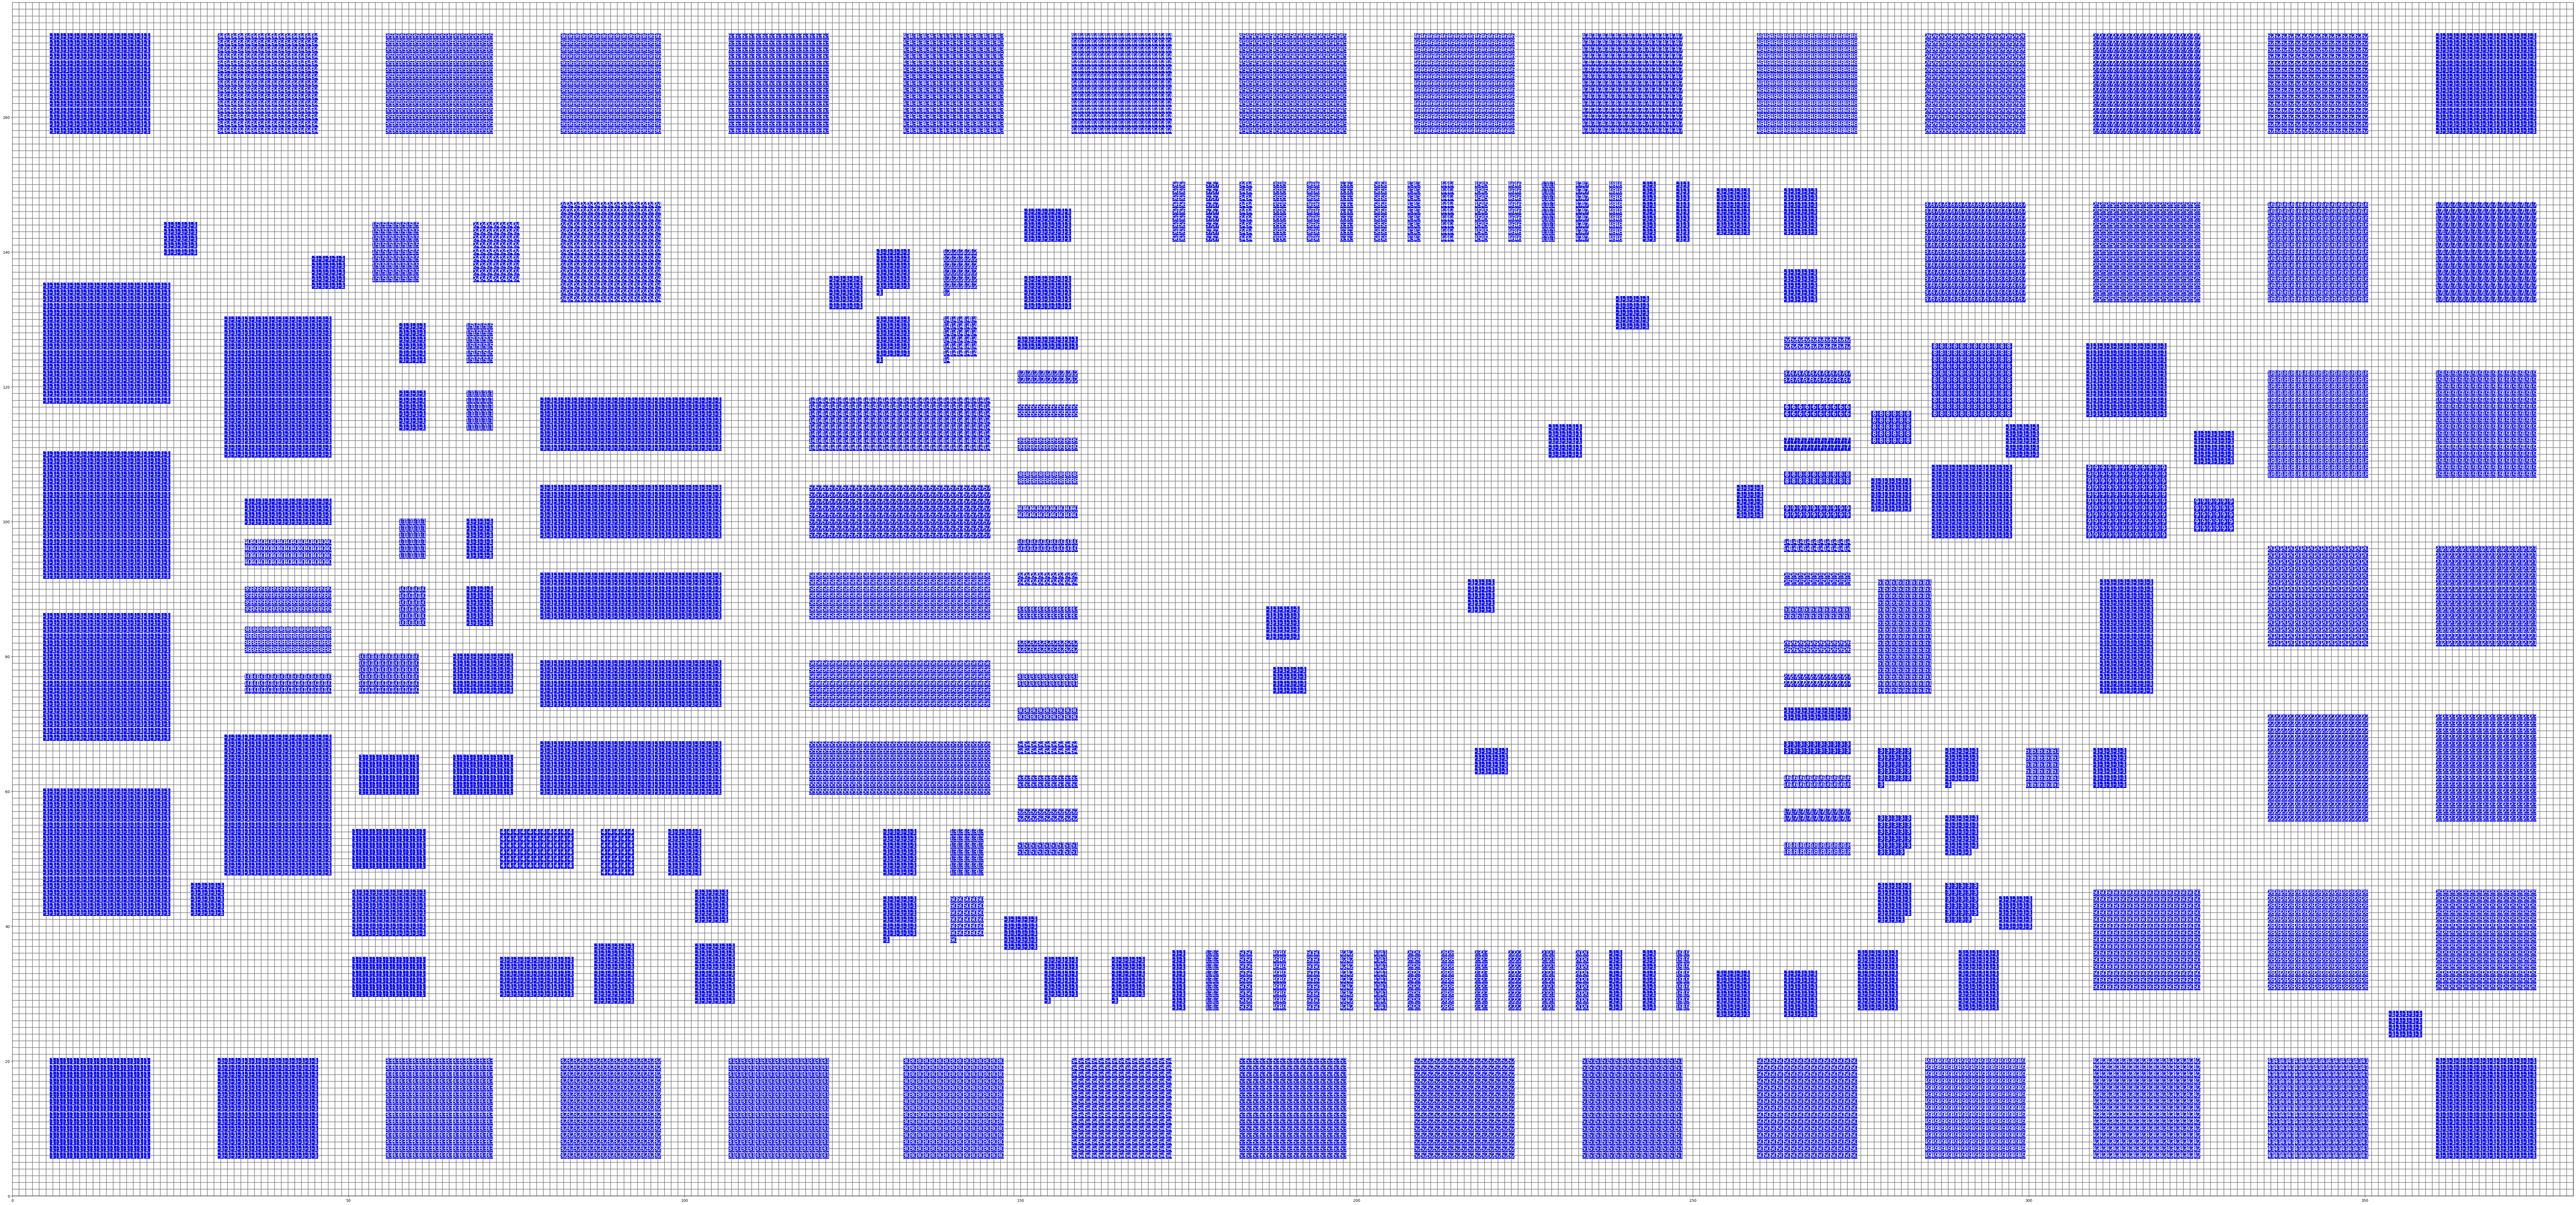

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def draw_board(paths, circuit_matrix, nets=None, save_name="test.jpg", clayer=0, via=False):
    
    # convert paths
    paths_x = []
    paths_y = []
    paths_z = []

    for path in paths:
        x_tmp = []
        y_tmp = []
        z_tmp = []
        for n in path:
            x_tmp.append(n[0])
            y_tmp.append(n[1])
            z_tmp.append(n[2])
        paths_x.append(x_tmp)
        paths_y.append(y_tmp)
        paths_z.append(z_tmp)

    width, height, layer = len(circuit_matrix), len(circuit_matrix[0]), len(circuit_matrix[0][0])
    fig = plt.figure(figsize=[width/4, height/4])

    ax = fig.add_subplot(111)

    # draw the grid
    for x in range(width):
        ax.plot([x, x], [0,height-1], color=(0.5,0.5,0.5,1))
    for y in range(height):
        ax.plot([0, width-1], [y,y], color=(0.5,0.5,0.5,1))

    # draw paths
    for p in range(len(paths_x)):

        if paths_x[p]:

            layer_path_x = defaultdict(list)
            layer_path_y = defaultdict(list)
            layer_idx = paths_z[p][0]
            tmp_x = []
            tmp_y = []
            for i, p_t in enumerate(paths_z[p]):
                if p_t==layer_idx:
                    tmp_x.append(paths_x[p][i])
                    tmp_y.append(paths_y[p][i])
                if p_t!=layer_idx or i==len(paths_z[p])-1:
                    layer_path_x[layer_idx].append(tmp_x)
                    layer_path_y[layer_idx].append(tmp_y)
                    tmp_x = [paths_x[p][i]]
                    tmp_y = [paths_y[p][i]]
                    layer_idx = p_t

            ph = plt.subplot()
            for idx in layer_path_x:
                color = "black"
                if idx==0:
                    color = "red"
                    alpha = 1.0
                elif idx==1:
                    color = "green"
                    alpha = 0.5
                elif idx==2:
                    color = "yellow"
                    alpha = 0.5
                elif idx==3:
                    color = "blue"
                    alpha = 0.5
                else:
                    color = "red"
                    alpha = 0.5
                for i in range(len(layer_path_x[idx])):
                    ph.plot(layer_path_x[idx][i], layer_path_y[idx][i], alpha=alpha, linewidth=5, color=color)

    # draw net number

    for x in range(width):
        for y in range(height):
            if not via:
                val = circuit_matrix[x][y][clayer]
                if val != 0:
                    ax.text(x, y, str(int(circuit_matrix[x][y][clayer])), fontsize=18, color='w',
                        horizontalalignment='center', verticalalignment='center')
            else:
                val = circuit_matrix[x][y][clayer]
                if val != 0:
                    ax.text(x, y, str(int(circuit_matrix[x][y][clayer])), fontsize=18, color='w',
                            horizontalalignment='center', verticalalignment='center')
    permenent_x = []
    permenent_y = []
    for x in range(width):
        for y in range(height):
            if not via and circuit_matrix[x][y][clayer] is None:
                permenent_x.append(y)
                permenent_y.append(x)
            elif via and circuit_matrix[x][y][clayer] is None:
                permenent_x.append(y)
                permenent_y.append(x)
    ax.scatter(permenent_y, permenent_x, marker='s', s=250, c='k')

    permenent_x = []
    permenent_y = []
    for x in range(width):
        for y in range(height):
            if not via and circuit_matrix[x][y][clayer] != 0:
                permenent_x.append(y)
                permenent_y.append(x)
            elif via and circuit_matrix[x][y][clayer] != 0:
                permenent_x.append(y)
                permenent_y.append(x)
    ax.scatter(permenent_y, permenent_x, marker='s', s=250, c='b')

    # scale the axis area to fill the whole figure
    ax.set_position([0,0,1,1])

    # get rid of axes and everything (the figure background will show through)
    # ax.set_axis_off()

    # scale the plot area conveniently (the board is in 0,0..18,18)
    ax.set_xlim(0,width-1)
    ax.set_ylim(0,height-1)
    
    fig.savefig(save_name)

draw_board(paths=[], circuit_matrix=matrix, clayer=0)
